KeyboardInterrupt: 

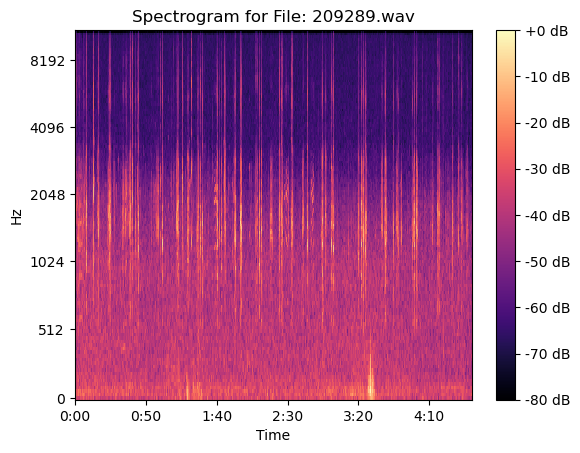

In [6]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define directory containing audio files
audio_dir = '../dataset/audio'

# Define the folder to process
folder_to_process = 'Kråke'

# Create output directory for spectrogram images
output_dir = os.path.join('.', 'dataset', folder_to_process + '_spectrograms')
os.makedirs(output_dir, exist_ok=True)

# Loop over each audio file in the folder
folder_path = os.path.join(audio_dir, folder_to_process)
for audio_file in os.listdir(folder_path):
    # Check if file is a WAV file
    if audio_file.endswith('.wav'):
        # Get full path of audio file
        audio_path = os.path.join(folder_path, audio_file)
        # Load audio file
        y, sr = librosa.load(audio_path)
        # Compute spectrogram
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        # Convert to decibels
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
        # Display spectrogram
        librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram for File: {}'.format(audio_file))
        # Save spectrogram as image file
        output_path = os.path.join(output_dir, os.path.splitext(audio_file)[0] + '.png')
        plt.savefig(output_path)
        # Clear current figure to free up memory
        plt.clf()